# Swiss Intl. Airlines: Data Analyst Operations Research Position

## 2. Interview Business Case: Skytrax Rating dataset

**Task**: Analyse the given dataset, showcase skills and approach to analysing, processing and extracting insights from the data.

Literal Task:

>Attached is a dataset which contains some data pertinent to the airline industry. For the next interview, we would like you to use this dataset and prepare a 10-min presentation on your findings. Please note that there is no correct answer to the exercise, as the objective is for you to showcase your skills and approach to analysing, processing and extracting insights from the data.

**Approach**:

Limited preparation time, therefore focus on:

- Swiss International Airlines
    - Destination Airports of Swiss
    - Swiss Lounges
    - Seats


- changes over time

- focus on turnaround times, missed connections (NLP?), Business travellers (-), 



Things to try:
- correlation matrix
- distributions
- violin plots?
- scatter plots?
- linear models
- NLP/Sentiment analysis?

---

In [2]:
#import data handling packages
import pandas as pd
import numpy as np

In [3]:
#import plotting packages
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [4]:
pd.set_option('display.max_colwidth', -1)

---

### Data Import

Data source: https://github.com/quankiquanki/skytrax-reviews-dataset  
Data by Skytrax (www.airlinequality.com)

In [5]:
airport = pd.read_csv(r"C:\Users\Stefan Fluck\Documents\Github\skytrax_OR\data\data\airport.csv")
airline = pd.read_csv(r"C:\Users\Stefan Fluck\Documents\Github\skytrax_OR\data\data\airline.csv")
lounge = pd.read_csv(r"C:\Users\Stefan Fluck\Documents\Github\skytrax_OR\data\data\lounge.csv")
seat = pd.read_csv(r"C:\Users\Stefan Fluck\Documents\Github\skytrax_OR\data\data\seat.csv")

In [6]:
print("airport:", airport.columns)
print("airline:",airline.columns)
print("lounge:",lounge.columns)
print("seat:",seat.columns)

airport: Index(['airport_name', 'link', 'title', 'author', 'author_country', 'date',
       'content', 'experience_airport', 'date_visit', 'type_traveller',
       'overall_rating', 'queuing_rating', 'terminal_cleanliness_rating',
       'terminal_seating_rating', 'terminal_signs_rating',
       'food_beverages_rating', 'airport_shopping_rating',
       'wifi_connectivity_rating', 'airport_staff_rating', 'recommended'],
      dtype='object')
airline: Index(['airline_name', 'link', 'title', 'author', 'author_country', 'date',
       'content', 'aircraft', 'type_traveller', 'cabin_flown', 'route',
       'overall_rating', 'seat_comfort_rating', 'cabin_staff_rating',
       'food_beverages_rating', 'inflight_entertainment_rating',
       'ground_service_rating', 'wifi_connectivity_rating',
       'value_money_rating', 'recommended'],
      dtype='object')
lounge: Index(['airline_name', 'link', 'title', 'author', 'author_country', 'date',
       'content', 'lounge_name', 'airport', 'lounge

Ideas:
- Drop seat dataset, as it may not be focus of what is interesting for the position. 
- Do swiss people rate Swiss Airlines or LSZH higher than other nationality? (-)
- queuing rating could be interesting? but: Which season (by date) and type traveller?

**Focus on: airport and airline dataset. airports- where swiss flies to, queuing stuff -> more data avbl iso. filtering for swiss stuff.  
airline: about swiss, NLP reg. connection flights (Nlp?)**

# Airline dataset

Turn date col into datetime format

In [7]:
airline['date'] = pd.to_datetime(airline.date)

airline['year'] = airline.date.dt.year
airline['month'] = airline.date.dt.month
airline['day'] = airline.date.dt.day

In [8]:
airline.airline_name[airline.airline_name.str.contains("swiss")].unique()
#only one swiss intl. air lines

array(['swiss-international-air-lines'], dtype=object)

How many comments specifically labelled about swiss?

In [9]:
airline[airline.airline_name=="swiss-international-air-lines"].content.shape

(336,)

how many contain a certain keyword? and return sample content.

In [10]:
keyword='connecti'
print(airline[(airline.airline_name=="swiss-international-air-lines") & (airline.content.str.contains('connecti'))].content.shape)
print(airline[(airline.airline_name=="swiss-international-air-lines") & (airline.content.str.contains('connecti'))].content[0:2])

(50,)
34138    Let me keep this short and to the point. Bangkok-Zurich leg - 11 Jul- Awful food, wooden service, cramped seats, no wifi. Check in app not working, social media team refused to resolve check in issues and instead forwarded me to their email. Not feasible since I had a quick transit and hardly any internet connection. Limited entertainment options. Zurich - Berlin leg, 11 Jul - Flight delayed. Still awful food. Zurich - Berlin leg, 15 Jul - On time. Still awful food. Berlin-Zurich leg, 16 Jul - Delayed flight, flight attendant was rude when asked if we will be ok since we have a connecting flight to Singapore. Awful food. Zurich-Singapore leg, 16 Jul - delayed as well. Disorganized boarding. Food was too bad I couldn't finish it because it was too salty. Food was delivered late, had to call attention of flight attendants who were very unfriendly. Never again for long haul flights.
34214    My flight from Geneva to London was cancelled. No message was sent out so I could r

In [26]:
print(airline[(airline.airline_name=="swiss-international-air-lines") & (airline.content.str.contains('connecti'))].iloc[0])


airline_name                     swiss-international-air-lines                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
link                             /airline-reviews/swiss-international-air-

In [27]:
airline_lx = airline[airline.airline_name == 'swiss-international-air-lines']

In [28]:
airline_lx.describe()

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended,year,month,day,type_traveller_b
count,318.000000,336.000000,336.000000,336.000000,333.000000,15.000000,3.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,7.185535,3.497024,3.851190,3.580357,2.735736,3.933333,3.333333,3.577381,0.717262,2013.497024,6.395833,15.824405,0.133929
std,2.764154,1.285971,1.354439,1.304219,1.623198,1.222799,0.577350,1.349392,0.451002,0.884353,3.377871,9.044936,0.620479
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,2012.000000,1.000000,1.000000,0.000000
25%,5.250000,3.000000,3.000000,3.000000,1.000000,3.500000,3.000000,3.000000,0.000000,2013.000000,4.000000,8.000000,0.000000
50%,8.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,1.000000,2013.000000,7.000000,16.000000,0.000000
75%,9.000000,4.000000,5.000000,5.000000,4.000000,5.000000,3.500000,5.000000,1.000000,2014.000000,9.000000,24.000000,0.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,1.000000,2015.000000,12.000000,31.000000,4.000000


Do a Wordcloud - anything interesting?

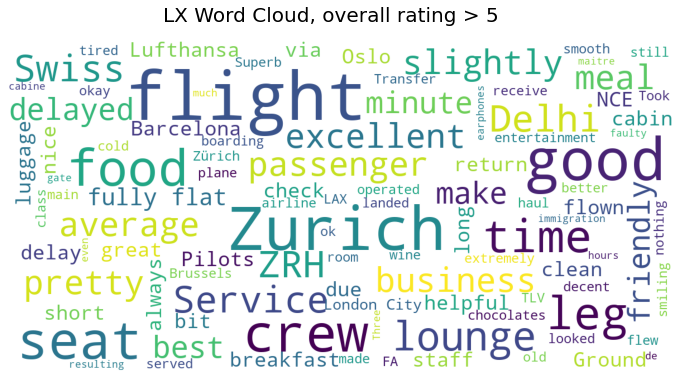

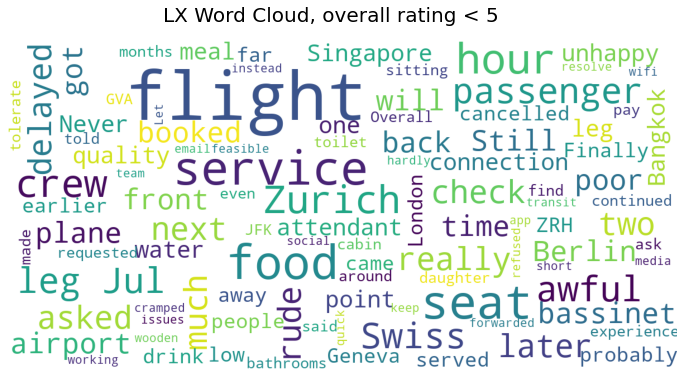

In [29]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["br", "href",'furthermore'])

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=1.37)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(airline_lx[airline_lx.overall_rating>5].content, title='LX Word Cloud, overall rating > 5')
show_wordcloud(airline_lx[airline_lx.overall_rating<5].content, title='LX Word Cloud, overall rating < 5')


In [31]:
airline.type_traveller.unique()
airline['type_traveller_b'] = airline.type_traveller.map({'FamilyLeisure':1,
                                                        'Couple Leisure':2,
                                                        'Solo Leisure':3,
                                                        'Business':4,
                                                       np.nan:0}) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000272BBB83688>,
      dtype=object)

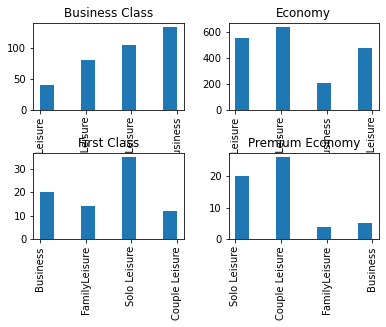

In [32]:
airline.type_traveller.hist(by=airline.cabin_flown)

In [33]:
print(airline.type_traveller.value_counts())
print('\nnumber of nans: ', airline.type_traveller.isna().sum())

Solo Leisure      804
FamilyLeisure     611
Couple Leisure    601
Business          362
Name: type_traveller, dtype: int64

number of nans:  39018


In [34]:
airline_lx.columns

Index(['airline_name', 'link', 'title', 'author', 'author_country', 'date',
       'content', 'aircraft', 'type_traveller', 'cabin_flown', 'route',
       'overall_rating', 'seat_comfort_rating', 'cabin_staff_rating',
       'food_beverages_rating', 'inflight_entertainment_rating',
       'ground_service_rating', 'wifi_connectivity_rating',
       'value_money_rating', 'recommended', 'year', 'month', 'day',
       'type_traveller_b'],
      dtype='object')

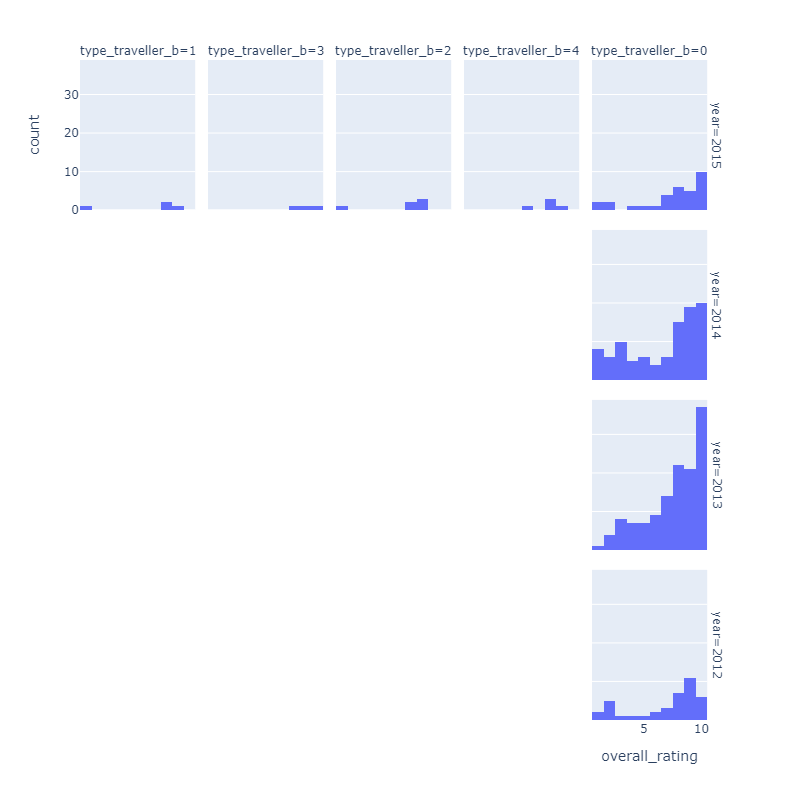

In [39]:
fig = px.histogram(airline_lx, x='overall_rating', facet_col='type_traveller_b', facet_row='year')
fig.update_layout(width=800, height=800,).show('png')

Traveller type wurde erst ab 2015 aufgenommen für swiss.

In [41]:
airline_lx.type_traveller.iloc[0]

'FamilyLeisure'

Preprocessing steps: 
- [ ] Drop apts with too few reviews

# Airport dataset

make plot with map and airports

In [42]:
airport['date'] = pd.to_datetime(airport.date)

airport['year'] = airport.date.dt.year
airport['month'] = airport.date.dt.month
airport['day'] = airport.date.dt.day

In [43]:
airport.columns

Index(['airport_name', 'link', 'title', 'author', 'author_country', 'date',
       'content', 'experience_airport', 'date_visit', 'type_traveller',
       'overall_rating', 'queuing_rating', 'terminal_cleanliness_rating',
       'terminal_seating_rating', 'terminal_signs_rating',
       'food_beverages_rating', 'airport_shopping_rating',
       'wifi_connectivity_rating', 'airport_staff_rating', 'recommended',
       'year', 'month', 'day'],
      dtype='object')

In [44]:
#source: wikipedia, filtered for pax type
LX_DEST = ['tirana-airport','buenos-aires-airport','graz-airport','vienna-airport','brussels-charleroi-airport',
          'sarajevo-airport','sao-paulo-congonhas-airport','montreal-trudeau-airport',
          'beijing-capital-airport','shanghai-hongqiao-airport',
           'pula-airport','prague-airport','copenhagen-airport','cairo-airport',
           'nice-cote-dazur-airport','paris-cdg-airport','berlin-schonefeld-airport',
           'bremen-airport','dresden-airport','dusseldorf-airport','frankfurt-hahn-airport',
           'hamburg-airport','hannover-airport','leipzighalle-airport','munich-airport','nuremburg-airport',
           'stuttgart-airport','westerland-sylt-airport', 'athens-airport','thessaloniki-airport',
           'hong-kong-airport','budapest-ferihegy-airport','delhi-airport','mumbai-airport',
           'cork-airport','dublin-airport','tel-aviv-airport','bari-palese-airport',
           'brindisi-airport','catania-airport','florence-airport','milan-bergamo-airport',
           'naples-airport','rome-ciampino-airport','venice-marco-polo-airport','tokyo-haneda-airport',
           'pristina-airport','beirut-airport','luxembourg-airport','malta-airport',
           'marrakech-airport','amsterdam-schiphol-airport','bergen-airport','oslo-airport',
           'gdansk-airport','krakow-airport','warsaw-chopin-airport','wroclaw-strachowice-airport',
           'lisbon-airport','porto-airport','bucharest-otopeni-airport','moscow-domodedovo-airport',
           'st-petersburg-airport','belgrade-airport','singapore-changi-airport','ljubljana-airport',
           'johannesburg-or-tambo-airport','alicante-airport','barcelona-airport','bilbao-airport',
           'madrid-barajas-airport','malaga-airport','palma-airport','valencia-airport',
           'geneva-airport','zurich-airport','bangkok-don-muang-airport','antalya-airport',
           'bodrum-airport','dalaman-airport','kiev-borispol-airport','dubai-airport',
           'birmingham-airport','london-city-airport','london-heathrow-airport','manchester-airport',
           'boston-logan-airport','chicago-ohare-airport','los-angeles-lax-airport',
           'miami-airport', 'new-york-jfk-airport','newark-airport','san-francisco-airport'
          ]

Not all Destinations are in there, but 93 is a good number.

In [45]:
len(LX_DEST)

93

Get Coordinates of them with geopy. if airport name not found, try with last part of name dropped.

In [47]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="testapp")

LX_DEST_LON = []
LX_DEST_LAT = []

for apt_name in LX_DEST:
    location = None
    location = geolocator.geocode(apt_name)
    
    if location == None:
        apt_name = '-'.join(apt_name.split('-')[0:-1])
        location = geolocator.geocode(apt_name)    
    
    #assign coords now
    if location != None:
        lon = location.longitude
        lat = location.latitude
    else:
        lon = -9999
        lat = -9999
        
    LX_DEST_LON.append(lon)
    LX_DEST_LAT.append(lat)


In [48]:
LX_DEST_DF = pd.DataFrame({
    'dest':LX_DEST,
    'lon':LX_DEST_LON,
    'lat':LX_DEST_LAT,
})

In [49]:
LX_DEST_DF[LX_DEST_DF.lon == -9999]

,dest,lon,lat
14,nice-cote-dazur-airport,-9999.0,-9999.0
23,leipzighalle-airport,-9999.0,-9999.0


In [50]:
LX_DEST_DF.loc[14,'lon'] = 7.213877
LX_DEST_DF.loc[14,'lat'] = 43.657852


In [51]:
LX_DEST_DF.loc[23,'lon'] = 12.2319
LX_DEST_DF.loc[23,'lat'] = 51.41847

In [52]:
LX_DEST_DF[LX_DEST_DF.dest.str.contains('athen')]

,dest,lon,lat
28,athens-airport,-73.844572,42.283975


In [53]:
LX_DEST_DF.loc[74,'lon'] = 6.1043
LX_DEST_DF.loc[74,'lat'] = 46.2336

In [54]:
LX_DEST_DF.loc[28,'lon'] = 23.9417
LX_DEST_DF.loc[28,'lat'] = 37.9341

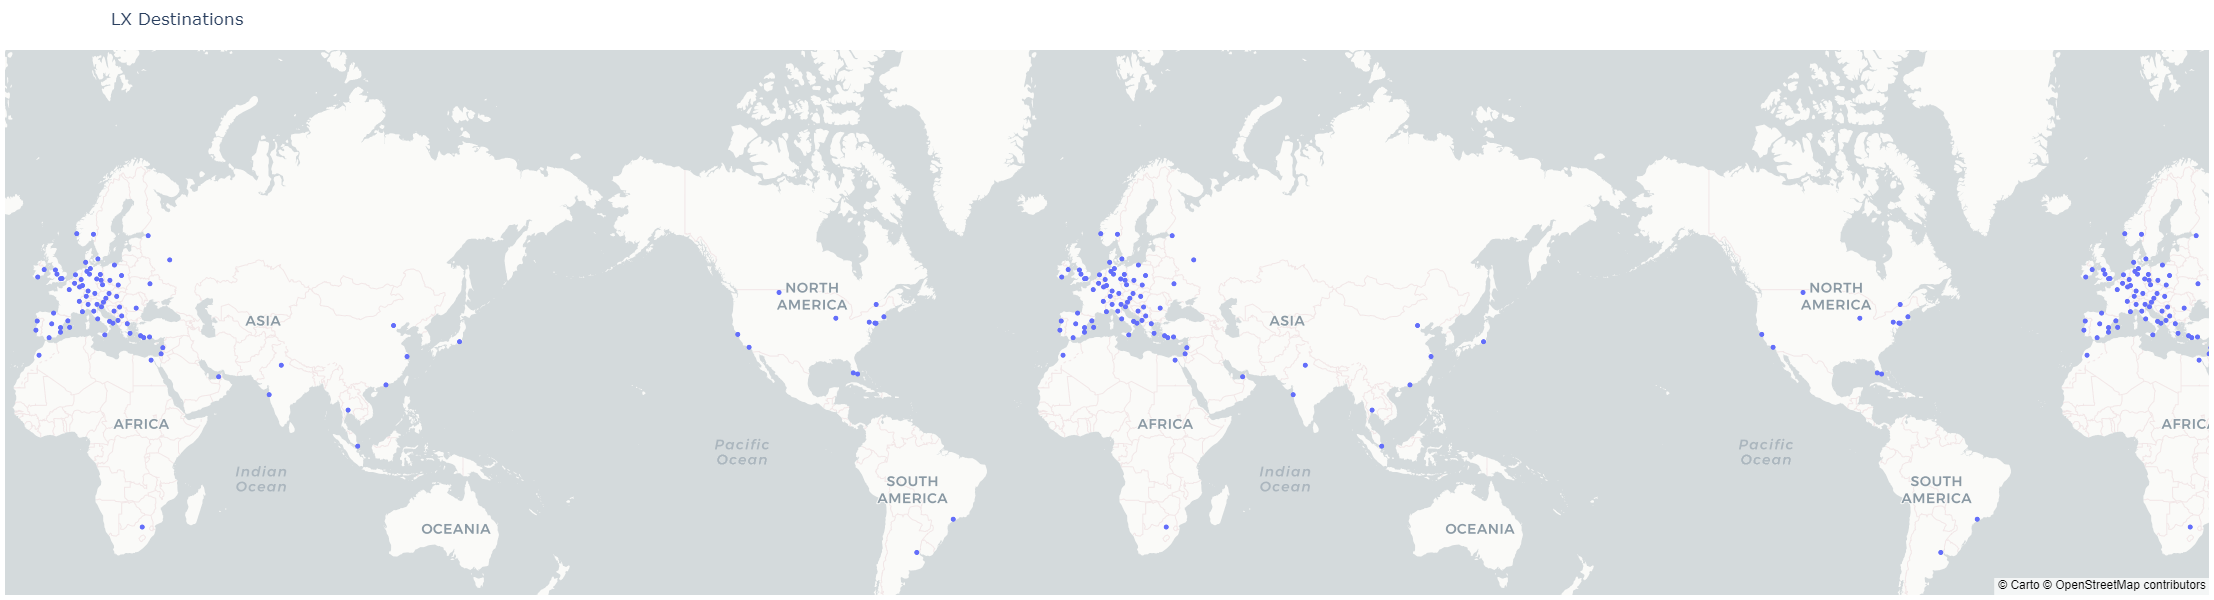

In [61]:
fig = px.scatter_mapbox(LX_DEST_DF, 
                  lat="lat", 
                  lon="lon",  
                  hover_name='dest',
                  zoom=1, 
                  mapbox_style = 'carto-positron',
                 title='LX Destinations',
                       width=1200, height=600)
fig.update_layout(
    margin={"r": 5, "t": 50, "l": 5, "b": 5}
)

Add coords to airport dataset

In [62]:
airport.shape

(17721, 23)

In [63]:
airport_avg_ranking = airport.groupby('airport_name').overall_rating.agg(['mean','median','count']).dropna()
print(airport_avg_ranking)

                       mean  median  count
airport_name                              
aalborg-airport    5.750000  5.0     8    
aberdeen-airport   3.181818  2.5     22   
abidjan-airport    8.000000  8.0     1    
abu-dhabi-airport  3.692308  3.0     104  
abuja-airport      3.000000  2.0     5    
...                     ...  ...     ...  
zanzibar-airport   2.200000  2.0     5    
zaragoza-airport   5.000000  5.0     2    
zhengzhou-airport  3.000000  3.0     1    
zhuhai-airport     3.500000  3.5     2    
zurich-airport     5.716216  5.0     74   

[703 rows x 3 columns]


In [64]:
airport_avg_ranking.sort_values(by='mean', ascending=False)

,mean,median,count
airport_name,,,
savannah-airport,10.0,10.0,2
harrisburg-airport,10.0,10.0,1
tours-val-de-loire-airport,10.0,10.0,1
friedrichshafen-airport,10.0,10.0,1
fort-wayne-airport,10.0,10.0,1
...,...,...,...
st-pete-clearwater-international-airport,1.0,1.0,1
port-harcourt-airport,1.0,1.0,1
kos-airport,1.0,1.0,1


Many airports have very few ratings. what's the distribution?

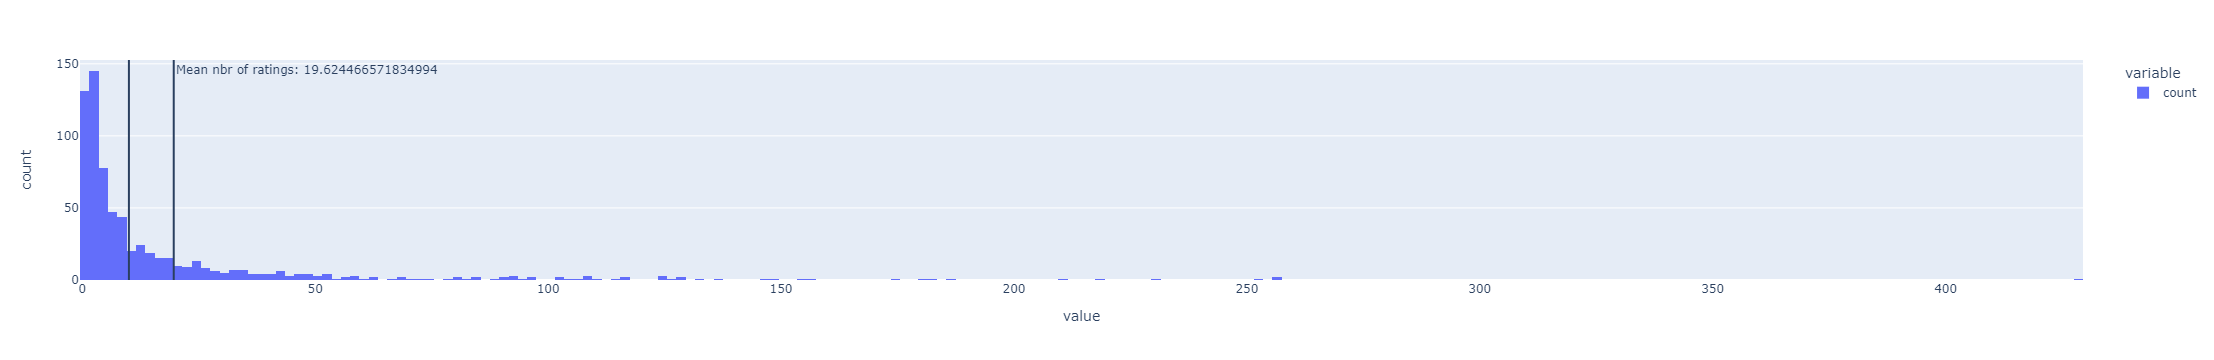

In [65]:
fig = px.histogram(airport_avg_ranking['count'].reset_index()['count'], nbins=250)
fig.add_vline(x=10)
mean_nbr_of_ratings = airport_avg_ranking['count'].reset_index()['count'].mean()
fig.add_vline(x=mean_nbr_of_ratings, annotation_text="Mean nbr of ratings: "+str(mean_nbr_of_ratings))

Only take the ones over 10 ratings.

In [66]:
airport_avg_ranking_f = airport_avg_ranking[airport_avg_ranking['count'] > 20]

In [67]:
airport_avg_ranking_f.sort_values(by='median', ascending=False)

,mean,median,count
airport_name,,,
southend-airport,7.480000,9.0,25
singapore-changi-airport,7.088889,7.5,180
incheon-airport,6.981132,7.0,106
tampa-airport,7.103448,6.0,29
zurich-airport,5.716216,5.0,74
...,...,...,...
jeddah-airport,2.440000,2.0,25
dalaman-airport,2.172414,1.0,58
heraklion-airport,2.121212,1.0,33


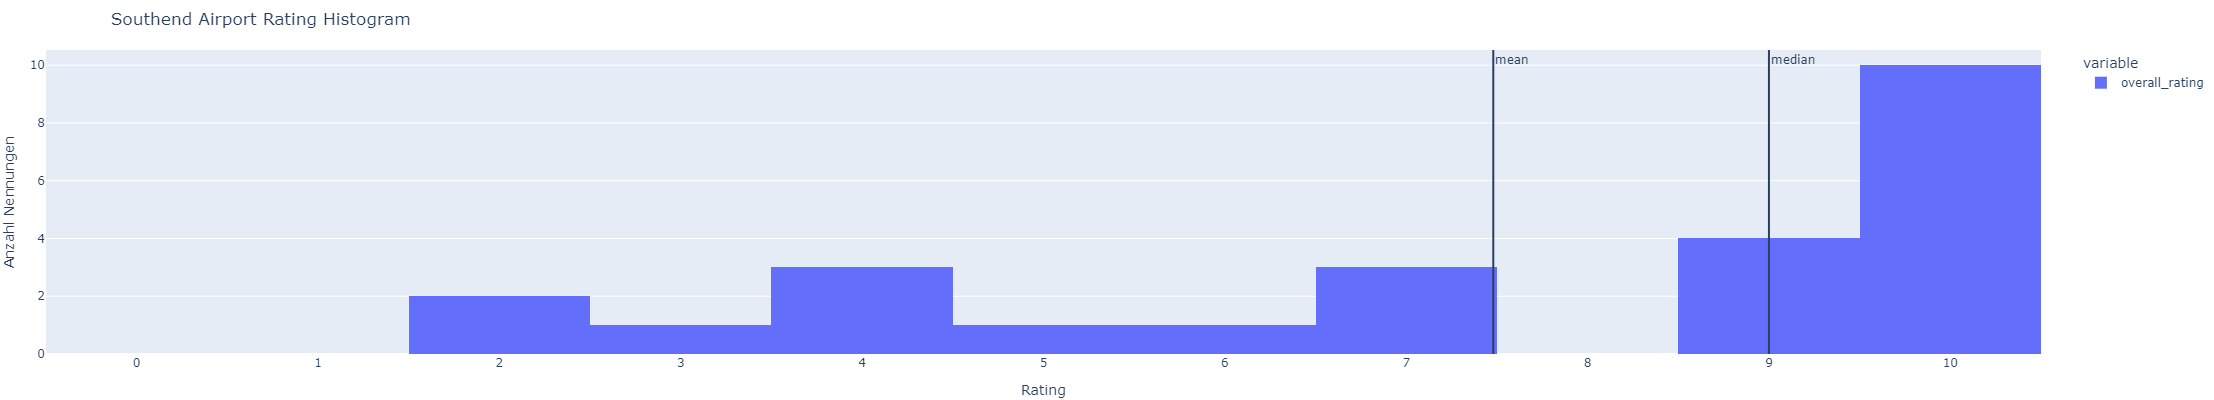

In [68]:
fig = px.histogram(airport[airport.airport_name == 'southend-airport'].overall_rating, nbins=10, 
                   title='Southend Airport Rating Histogram')
fig.add_vline(x=airport[airport.airport_name == 'southend-airport'].overall_rating.median(), 
              annotation_text='median')
fig.add_vline(x=airport[airport.airport_name == 'southend-airport'].overall_rating.mean(), 
              annotation_text='mean')
fig.update_layout(xaxis=dict(tick0=0, dtick=1, range=[-0.5,10.5], title='Rating'),
                  yaxis=dict(title='Anzahl Nennungen'),
                 width=800, height=400, margin={"r": 5, "t": 50, "l": 5, "b": 5})

Get median of airport overall rating together with LX destination

In [69]:
airport_lxdest = airport[airport.airport_name.isin(LX_DEST)]

In [70]:
airport_lxdest.columns

Index(['airport_name', 'link', 'title', 'author', 'author_country', 'date',
       'content', 'experience_airport', 'date_visit', 'type_traveller',
       'overall_rating', 'queuing_rating', 'terminal_cleanliness_rating',
       'terminal_seating_rating', 'terminal_signs_rating',
       'food_beverages_rating', 'airport_shopping_rating',
       'wifi_connectivity_rating', 'airport_staff_rating', 'recommended',
       'year', 'month', 'day'],
      dtype='object')

Get number of airports in new dataset, looks good.

In [71]:
airport_lxdest.airport_name.unique().shape

(93,)

In [72]:
airport_overall = airport.groupby('airport_name').overall_rating.agg(['mean','median','count']).dropna()
lx_dest_airport_overall = airport_overall[airport_overall.index.isin(LX_DEST)]

Create Ranking of best LX destination airports that have over 10 ratings in the database:

In [73]:
lx_dest_apt_overall_f = lx_dest_airport_overall[lx_dest_airport_overall['count']>20].sort_values('median', ascending=False)
print(lx_dest_apt_overall_f[0:20])

                                mean  median  count
airport_name                                       
singapore-changi-airport    7.088889  7.5     180  
zurich-airport              5.716216  5.0     74   
delhi-airport               5.769841  5.0     126  
amsterdam-schiphol-airport  5.545455  5.0     154  
munich-airport              5.304348  5.0     92   
hong-kong-airport           6.197452  5.0     157  
san-francisco-airport       4.932203  5.0     59   
prague-airport              5.923077  5.0     39   
tel-aviv-airport            5.324324  5.0     37   
athens-airport              6.166667  5.0     42   
barcelona-airport           4.866667  4.5     60   
venice-marco-polo-airport   4.069767  4.0     43   
vienna-airport              4.343137  4.0     102  
palma-airport               4.560000  4.0     25   
oslo-airport                3.785714  4.0     42   
nice-cote-dazur-airport     4.160000  4.0     25   
warsaw-chopin-airport       4.255319  4.0     47   
moscow-domod

**LSZH has only median of 5?**

In [74]:
LX_DEST_DF.set_index('dest', inplace=True)

In [75]:
LX_DEST_DF

,lon,lat
dest,,
tirana-airport,19.719648,41.414080
buenos-aires-airport,-59.468887,-33.859722
graz-airport,15.440023,46.988748
vienna-airport,16.564274,48.120226
brussels-charleroi-airport,4.466173,50.463637
...,...,...
los-angeles-lax-airport,-118.421393,33.942168
miami-airport,-80.258274,25.797414
new-york-jfk-airport,-73.779373,40.642948


In [76]:
lx_dest_apt_overall_f_coords = lx_dest_apt_overall_f.join(LX_DEST_DF)

lx_dest_apt_overall_f_coords = lx_dest_apt_overall_f_coords.reset_index()
lx_dest_apt_overall_f_coords.shape
lx_dest_apt_overall_f_coords.columns

Index(['airport_name', 'mean', 'median', 'count', 'lon', 'lat'], dtype='object')

Make a new map but make the dots a bit cooler:

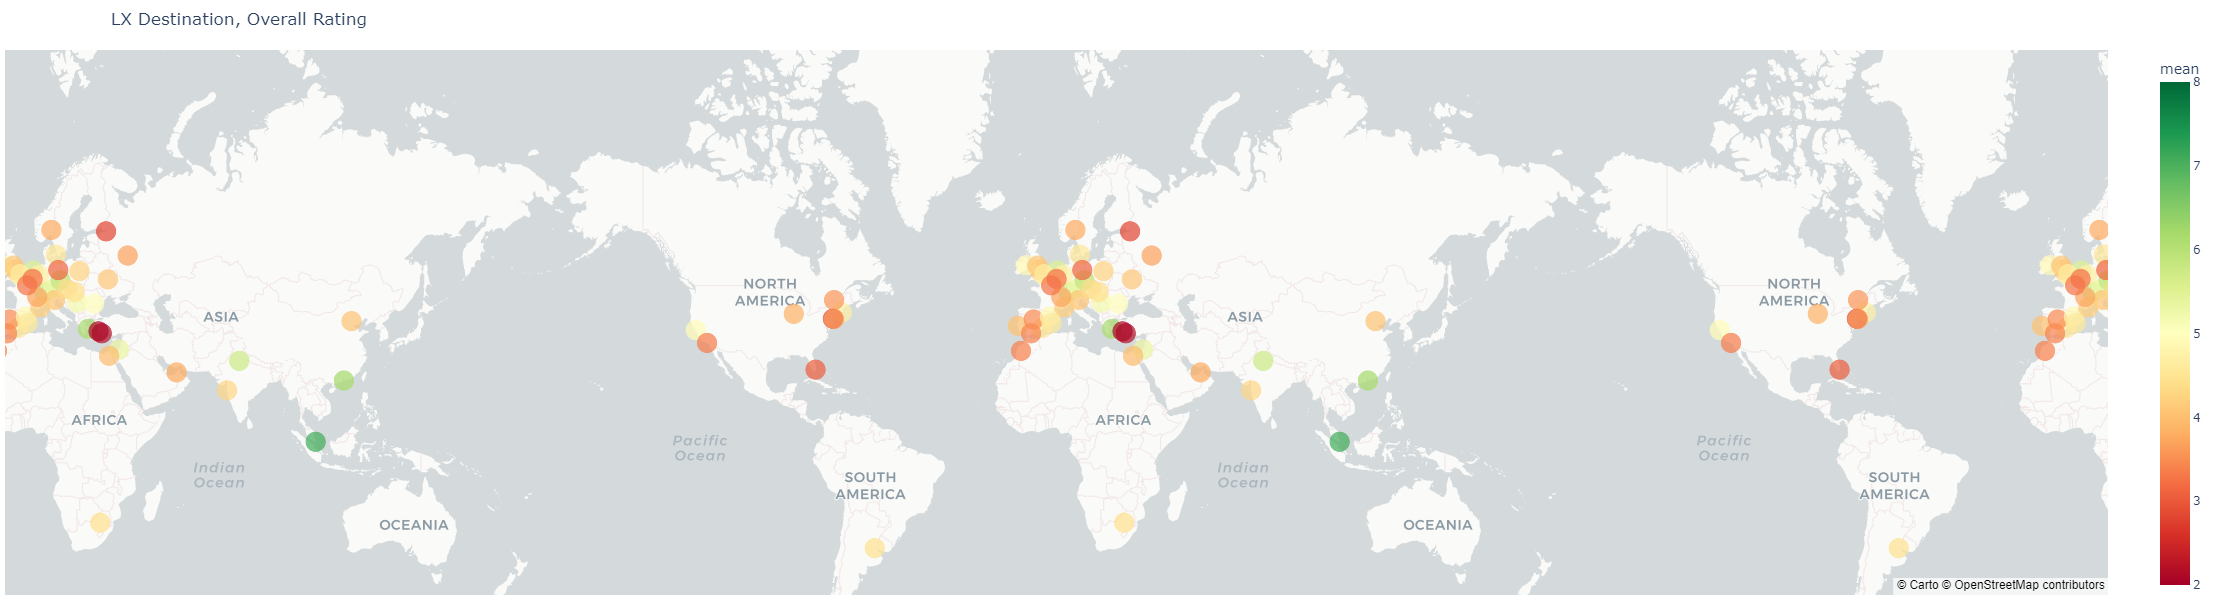

In [78]:
fig = px.scatter_mapbox(lx_dest_apt_overall_f_coords, 
                  lat="lat", 
                  lon="lon",
                  color='mean',
                  #size=lx_dest_apt_overall_f_coords['median'].multiply(100),
                  size=len(lx_dest_apt_overall_f_coords)*[1],
                  hover_name='airport_name',
                  hover_data=['median','mean','count'],
                  zoom=1, size_max=15,
                  color_continuous_scale = "RdYlGn",
                  range_color=[2,8],
                  mapbox_style = 'carto-positron',
                  title='LX Destination, Overall Rating',
                  width=1200, height=600,
                )
fig.update_layout(
    margin={"r": 5, "t": 50, "l": 5, "b": 5},
)

Have a look at some big airports and their rating distribution. Change over time??
- Zurich vs GVA -> lineplot over years?
- singaporechangi
- newark vs jfk

In [79]:
airport[airport.airport_name.isin(['zurich-airport','geneva-airport'])].groupby(['airport_name','year']).agg(['mean','median','count'])['overall_rating']

mean  median  count
airport_name   year                         
geneva-airport 2006 NaN       NaN      0    
               2007  3.750000  4.0     8    
               2008  2.866667  2.0     15   
               2009  2.600000  3.0     5    
               2010  2.750000  2.5     8    
               2011  1.833333  1.5     6    
               2012  2.600000  2.0     5    
               2013  7.000000  9.0     8    
               2014  4.500000  3.0     8    
               2015  5.333333  5.5     6    
zurich-airport 2009  4.470588  5.0     17   
               2010  3.692308  4.0     13   
               2011  4.000000  4.0     7    
               2012  6.125000  6.0     8    
               2013  9.500000  10.0    12   
               2014  6.166667  6.0     12   
               2015  6.800000  7.0     5

In [80]:
airport_lszh_lsgg = airport[airport.airport_name.isin(['zurich-airport','geneva-airport'])]
airport_lszh_lsgg_grouped = airport[airport.airport_name.isin(['zurich-airport','geneva-airport'])].groupby(['airport_name','year']).agg(['mean','median','count'])['overall_rating']

(0.0, 10.0)

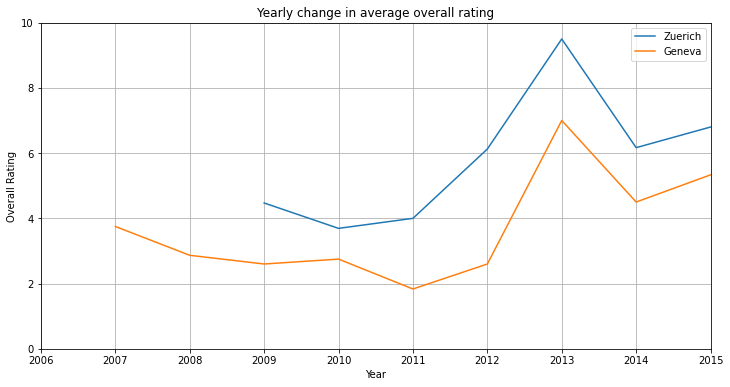

In [86]:
lszh = airport_lszh_lsgg[airport_lszh_lsgg.airport_name=='zurich-airport']
lszh_yearly = lszh.groupby('year').mean()['overall_rating']
lsgg = airport_lszh_lsgg[airport_lszh_lsgg.airport_name=='geneva-airport']
lsgg_yearly = lsgg.groupby('year').mean()['overall_rating']

fig = plt.figure(figsize=(12,6))
ax = fig.gca()
lszh_yearly.plot(ax=ax, label='Zuerich')
lsgg_yearly.plot(ax=ax, label = 'Geneva')
ax.legend()
ax.set_title('Yearly change in average overall rating')
ax.set_xlabel('Year'); ax.set_ylabel('Overall Rating')
ax.grid(); ax.set_ylim([0,10])

Whats 2013 going on?

In [87]:
airport_lszh_lsgg_grouped

mean  median  count
airport_name   year                         
geneva-airport 2006 NaN       NaN      0    
               2007  3.750000  4.0     8    
               2008  2.866667  2.0     15   
               2009  2.600000  3.0     5    
               2010  2.750000  2.5     8    
               2011  1.833333  1.5     6    
               2012  2.600000  2.0     5    
               2013  7.000000  9.0     8    
               2014  4.500000  3.0     8    
               2015  5.333333  5.5     6    
zurich-airport 2009  4.470588  5.0     17   
               2010  3.692308  4.0     13   
               2011  4.000000  4.0     7    
               2012  6.125000  6.0     8    
               2013  9.500000  10.0    12   
               2014  6.166667  6.0     12   
               2015  6.800000  7.0     5

In [88]:
airport_lszh_lsgg_grouped_reset = airport_lszh_lsgg_grouped.reset_index()

In [89]:
airport_lszh_lsgg_grouped_reset

,airport_name,year,mean,median,count
0,geneva-airport,2006,NaN,NaN,0
1,geneva-airport,2007,3.750000,4.0,8
2,geneva-airport,2008,2.866667,2.0,15
3,geneva-airport,2009,2.600000,3.0,5
4,geneva-airport,2010,2.750000,2.5,8
5,geneva-airport,2011,1.833333,1.5,6
6,geneva-airport,2012,2.600000,2.0,5
7,geneva-airport,2013,7.000000,9.0,8
8,geneva-airport,2014,4.500000,3.0,8
9,geneva-airport,2015,5.333333,5.5,6


Text(0, 0.5, 'Overall Rating')

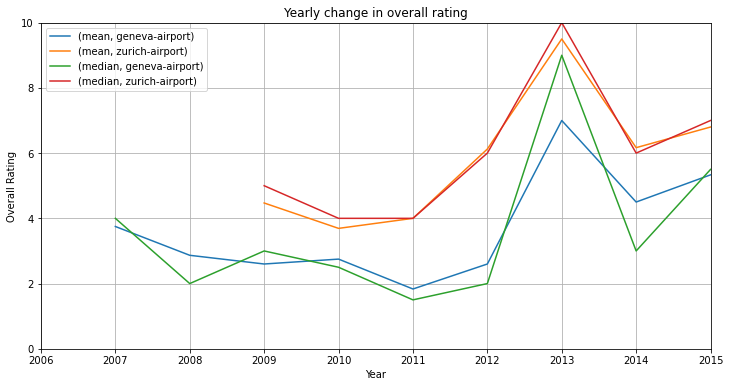

In [95]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()
airport_lszh_lsgg_grouped_reset.pivot(index='year', columns='airport_name')[['mean','median']].plot(ax=ax)
ax.legend()
ax.set_title('Yearly change in overall rating')
ax.grid(); ax.set_ylim([0,10])
ax.set_xlabel('Year'); ax.set_ylabel('Overall Rating')

In [96]:
airport_lszh_lsgg_2013 = airport_lszh_lsgg[airport_lszh_lsgg.year==2013]

In [97]:
print('lszh mean overall = ',airport_lszh_lsgg_2013[airport_lszh_lsgg_2013.airport_name=='geneva-airport'].overall_rating.mean())
print('lszh median overall = ',airport_lszh_lsgg_2013[airport_lszh_lsgg_2013.airport_name=='geneva-airport'].overall_rating.median())

print('zurich mean overall = ',airport_lszh_lsgg_2013[airport_lszh_lsgg_2013.airport_name=='zurich-airport'].overall_rating.mean())
print('zurich median overall = ',airport_lszh_lsgg_2013[airport_lszh_lsgg_2013.airport_name=='zurich-airport'].overall_rating.median())

lszh mean overall =  7.0
lszh median overall =  9.0
zurich mean overall =  9.5
zurich median overall =  10.0


C:\Users\Stefan Fluck\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:385: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared

C:\Users\Stefan Fluck\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\Stefan Fluck\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

C:\Users\Stefan Fluck\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.sta

Text(0.5, 0.98, 'Overall Ratings given by Year for ZUE and GVA')

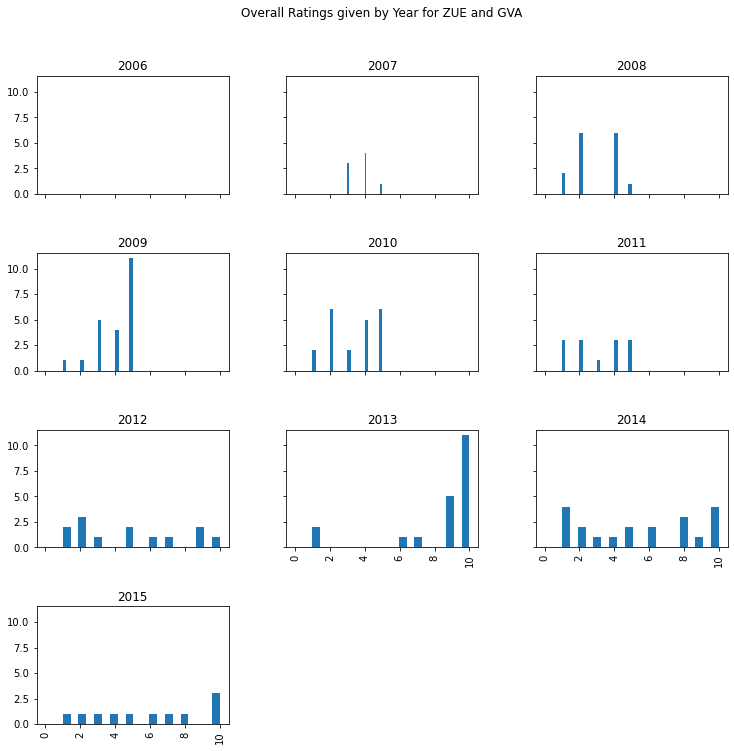

In [98]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
airport_lszh_lsgg.hist(column='overall_rating', by='year', ax=ax, sharex=True, sharey=True, bins=20)
fig.suptitle('Overall Ratings given by Year for ZUE and GVA')

In [99]:
airport_lszh_lsgg[airport_lszh_lsgg.year==2013].overall_rating

6018     9.0 
6019     9.0 
6020     10.0
6021     10.0
6022    NaN  
6023     10.0
6024    NaN  
6025     6.0 
6026    NaN  
6027     1.0 
6028     1.0 
17664    9.0 
17665    10.0
17666    7.0 
17667    10.0
17668    9.0 
17669    10.0
17670    10.0
17671    10.0
17672    9.0 
17673    10.0
17674    10.0
17675    10.0
Name: overall_rating, dtype: float64

### check: lszh and word connect*?